In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

# For ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("../data/material_prices.csv")
print(df.head())

   Year Material  Price (INR per ton)
0  2015   Cement                  426
1  2015    Steel                45459
2  2015     Sand                 1060
3  2015   Bricks                 6294
4  2015     Wood                15130


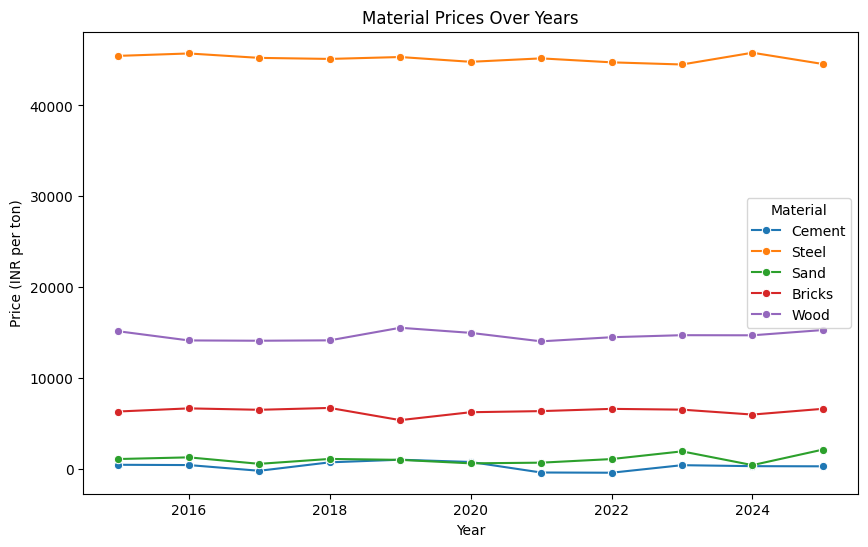

In [14]:
# Line plot for material prices over years
df.rename(columns={"Price (INR per ton)": "Price"}, inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Price', hue='Material', marker='o')
plt.title("Material Prices Over Years")
plt.ylabel("Price (INR per ton)")
plt.show()


In [15]:
# Simple regression example: predict Cement prices
cement_df = df[df['Material'] == 'Cement']

# Features and target
X = cement_df[['Year']]  # Independent variable
y = cement_df['Price']   # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Cement ---
R2 Score: -1.9508951667132282
MAE: 262.6025408348457
RMSE: 330.41182385351175




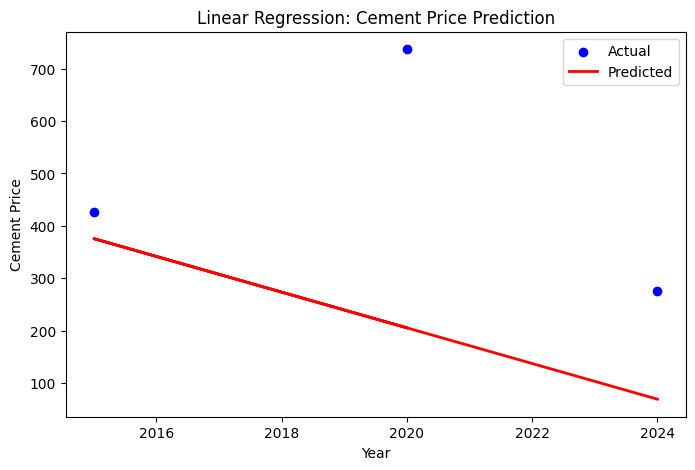

✅ Model saved as ../results/Cement_model.pkl
--- Steel ---
R2 Score: -2.0770726722099
MAE: 561.2897761645436
RMSE: 727.9995690690149




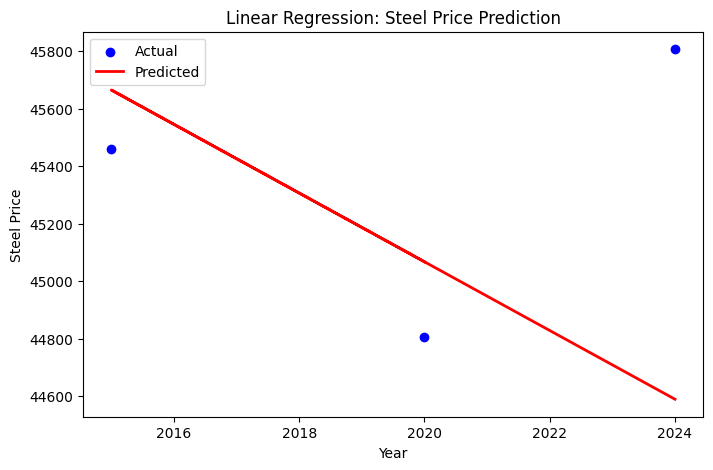

✅ Model saved as ../results/Steel_model.pkl
--- Sand ---
R2 Score: -8.065016652698153
MAE: 774.3194192377463
RMSE: 848.1992837589356




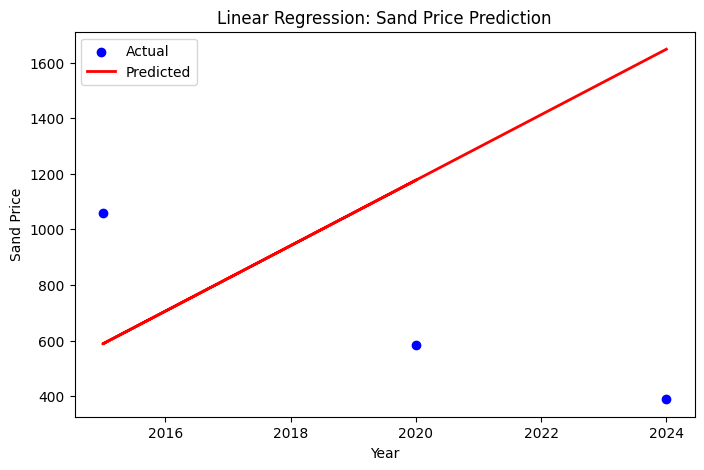

✅ Model saved as ../results/Sand_model.pkl
--- Bricks ---
R2 Score: -3.328533500019363
MAE: 234.06352087114524
RMSE: 299.39310882973626




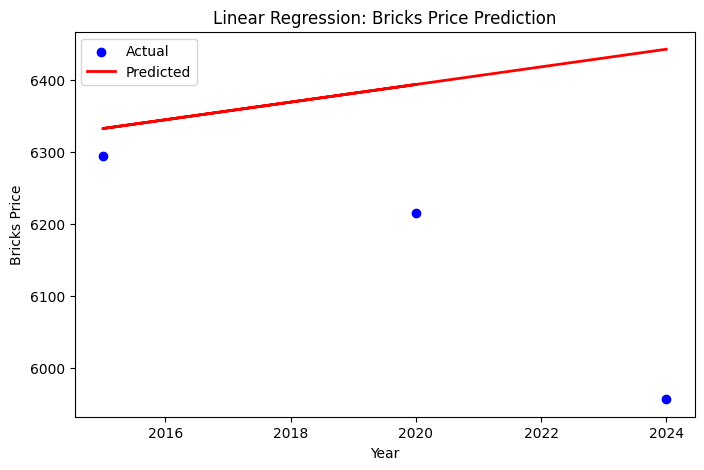

✅ Model saved as ../results/Bricks_model.pkl
--- Wood ---
R2 Score: -12.553237558724506
MAE: 566.6485178463336
RMSE: 672.2784445120204




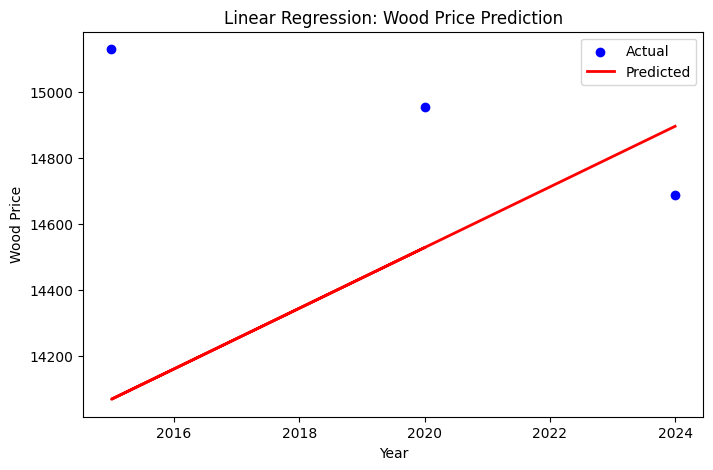

✅ Model saved as ../results/Wood_model.pkl


In [16]:
# -------------------------------
# Linear Regression + Plot + Save
# -------------------------------

# Pivot data so each material is a separate column (wide format)
df_wide = df.pivot(index='Year', columns='Material', values='Price').reset_index()

materials = ['Cement', 'Steel', 'Sand', 'Bricks', 'Wood']  # list of materials

for material in materials:
    # Features & Target
    X = df_wide[['Year']]
    y = df_wide[material]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"--- {material} ---")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)
    print("\n")

    # Plot actual vs predicted
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
    plt.xlabel("Year")
    plt.ylabel(f"{material} Price")
    plt.title(f"Linear Regression: {material} Price Prediction")
    plt.legend()

    # Save the plot in results folder
    plt.savefig(f"../results/{material}_price_prediction.png")
    plt.show()

    # ✅ Save trained model inside loop
    import joblib
    joblib.dump(model, f"../results/{material}_model.pkl")
    print(f"✅ Model saved as ../results/{material}_model.pkl")





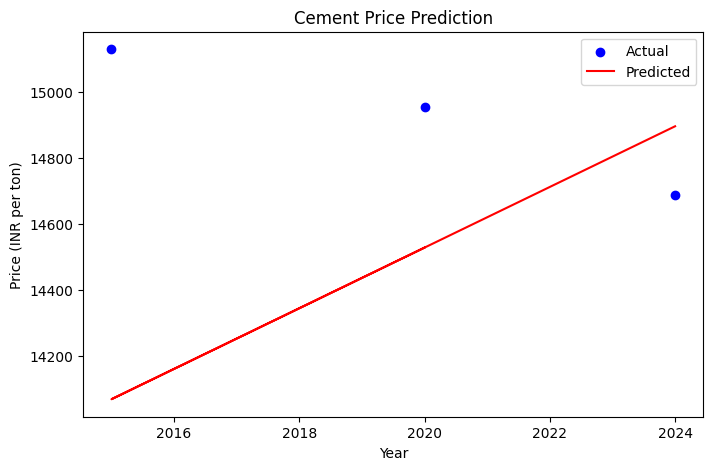

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Cement Price Prediction")
plt.xlabel("Year")
plt.ylabel("Price (INR per ton)")
plt.legend()
plt.show()


In [18]:
# Save predicted prices to results folder
pred_df = pd.DataFrame({'Year': X_test['Year'], 'Actual_Price': y_test, 'Predicted_Price': y_pred})
pred_df.to_csv("../results/predicted_cement_prices.csv", index=False)
print("Predictions saved to results/predicted_cement_prices.csv")


Predictions saved to results/predicted_cement_prices.csv


In [ ]:
import joblib
import numpy as np
import pandas as pd

# Define materials and future years
materials = ['Cement', 'Steel', 'Sand', 'Bricks', 'Wood']
future_years = np.array([[2026], [2027], [2028]])

# Store predictions
predictions = {}

for material in materials:
    # Load model
    model = joblib.load(f"../results/{material}_model.pkl")
    
    # Predict future prices
    future_preds = model.predict(future_years)
    
    # Save in dictionary
    predictions[material] = future_preds

# Convert to DataFrame for better display
df_future = pd.DataFrame(predictions, index=future_years.flatten())
df_future.index.name = "Year"

print(" Future Price Predictions (INR per ton)")
display(df_future)


📊 Future Price Predictions (INR per ton)


c:\Users\Sujal\anaconda3\envs\material_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sujal\anaconda3\envs\material_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sujal\anaconda3\envs\material_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sujal\anaconda3\envs\material_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sujal\anaconda3\envs\material_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but

,Cement,Steel,Sand,Bricks,Wood
Year,,,,,
2026,1.087114,44351.125227,1883.606171,6466.822142,15080.197822
2027,-32.961887,44231.742287,2001.390200,6479.047187,15172.274047
2028,-67.010889,44112.359347,2119.174229,6491.272232,15264.350272
